In [ ]:
import pandas as pd
import numpy as np

import re

import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm

In [ ]:
# from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

from string import punctuation
from itertools import chain

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Set Plotting parameters

In [ ]:
# set plot rc parameters

# jtplot.style(grid=False)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#464646'
#plt.rcParams['axes.edgecolor'] = '#FFFFFF'
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['text.color'] = '#666666'
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.color'] = '#666666'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.color'] = '#666666'
plt.rcParams['ytick.labelsize'] = 14

# plt.rcParams['font.size'] = 16

sns.color_palette('dark')
%matplotlib inline

tqdm.pandas()

In [ ]:
!unzip Reviews.zip

Archive:  Reviews.zip
  inflating: Reviews.csv             


In [ ]:
data_df=pd.read_csv('Reviews.csv')
data_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# drop duplicate data points

data_df.drop_duplicates(inplace=True)
data_df.shape

(568454, 10)

In [ ]:
data_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data_df['Sentiment'] = data_df['Score'].apply(lambda x: 1 if x>3 else 0)

In [ ]:
# remove non alphabetic characters

def remove_non_alphabet(sentence):
    pattern = re.compile(r'[^a-z]+')
    sentence = sentence.lower()
    sentence = pattern.sub(' ', sentence).strip()
    
    return sentence

data_df['Clean_text'] = data_df['Text'].apply(lambda x: remove_non_alphabet(x))

In [ ]:
# remove stopwords and stemming
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def remove_stop_words(sentence):
    # Tokenize
    word_list = word_tokenize(sentence)
    # stop words
    stopwords_list = set(stopwords.words('english'))
    # remove stop words
    word_list = [word for word in word_list if word not in stopwords_list]
    # stemming
    ps  = PorterStemmer()
    word_list = [ps.stem(word) for word in word_list]
    # list to sentence
    sentence = ' '.join(word_list)
    
    return sentence

data_df['Clean_text'] = data_df['Clean_text'].progress_apply(lambda x: remove_stop_words(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


100%|██████████| 568454/568454 [12:04<00:00, 784.51it/s]


In [ ]:
data_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Clean_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confect around centuri light pillowi citru gel...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffi great price wide assort yummi taff...


In [ ]:
# vectorize data 

# bag of words
bow = CountVectorizer()
X_bow = bow.fit_transform(data_df['Clean_text'])
# Xtest_bow = bow.fit_transform(test_df['Clean_text'])

# tfidf 
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(data_df['Clean_text'])
# Xtest_tfidf = tfidf.fit_transform(test_df['Clean_text'])

# ytrain and ytest
# Ytrain = train_df['Sentiment']
# Ytest = test_df['Sentiment']

In [ ]:
Xtrain_bow, Xtest_bow, Ytrain, Ytest = train_test_split(X_bow, data_df['Sentiment'], test_size=0.25, random_state=12)
Xtrain_tfidf, Xtest_tfidf, Ytrain, Ytest = train_test_split(X_tfidf, data_df['Sentiment'], test_size=0.25, random_state=12)

In [ ]:
# # plot word cloud function

# def plot_wordcloud(sentences, title):
#     # create word cloud
#     wordcloud = WordCloud(background_color='black',
#                           max_words=200).generate(str(sentences))
#     # plt params
#     fig = plt.figure(figsize=[15,15])
#     plt.axis('off')
#     plt.suptitle(title, fontsize=18)
#     plt.subplots_adjust(top=1.4)
#     plt.imshow(wordcloud)
#     plt.show()
    
#     return

In [ ]:
# # plot word cloud for training data with positive examples
# plot_wordcloud(data_df[data_df['Sentiment'] == 1]['Clean_text'], 'data points with positive sentiment')

In [ ]:
# # plot word cloud for training data with negative examples
# plot_wordcloud(data_df[data_df['Sentiment'] == 0]['Clean_text'], 'data points with negative sentiment')

In [ ]:
# fig = plt.figure(figsize=[6,8])
# plt.suptitle('Sentiment Distribution', fontsize=18)
# ax = sns.countplot(data=data_df,x='Sentiment')
# ax.set_xticklabels(['negative', 'positive'])
# plt.show()

In [ ]:
# Function to print model performance summary statistics

def performance_summary(model, Xtrain, Xtest, Ytrain, Ytest):
    
    Ytrain_pred = model.predict(Xtrain)
    Ytest_pred = model.predict(Xtest)

    # model performance
    # accuracy score
    print('Training Accuracy:\n', accuracy_score(Ytrain, Ytrain_pred))
    print('\n')
    print('Test Accuracy:\n', accuracy_score(Ytest, Ytest_pred))
    print('\n')
    # classification report
    print('Classification Report training:\n', classification_report(Ytrain,Ytrain_pred))
    print('\n')
    print('Classification Report test:\n', classification_report(Ytest,Ytest_pred))
    
    return

In [ ]:
# Function to plot Confusion matrix

def plot_confusion_matrix(model, Xtrain, Xtest, Ytrain, Ytest):
    
    Ytrain_pred = model.predict(Xtrain)
    Ytest_pred = model.predict(Xtest)

    # confusion matrix
    fig, axs = plt.subplots(1,2,
                            figsize=[15,5])
    axs = axs.flatten()
    
    axs[0].title.set_text('Training data')
    # axs[0].set_xlabel('Predicted label')
    # axs[0].set_ylabel('True label')
    axs[1].title.set_text('Test data')
    # axs[1].set_xlabel('Predicted label')
    # axs[1].set_ylabel('True label')
    
    fig.text(0.26, 0.01, 'Predicted label', ha='center', size=14)
    fig.text(0.69, 0.01, 'Predicted label', ha='center', size=14)
    fig.text(0.08, 0.5, 'True label', va='center', rotation='vertical', size=14)
    fig.text(0.5, 0.5, 'True label', va='center', rotation='vertical', size=14)
    
    sns.heatmap(confusion_matrix(Ytrain,Ytrain_pred),
                    annot=True,
                    xticklabels=['negative', 'positive'],
                    yticklabels=['negative', 'positive'],
                    fmt="d",
                    ax=axs[0])
    
    sns.heatmap(confusion_matrix(Ytest,Ytest_pred),
                    annot=True,
                    xticklabels=['negative', 'positive'],
                    yticklabels=['negative', 'positive'],
                    fmt="d",
                    ax=axs[1])
    plt.show()
    
    return

In [ ]:
# Function to plot ROC

def plot_roc(model, Xtrain, Xtest, Ytrain, Ytest):
    # ROC curve and area under ROC curve

    # get FPR and TPR for training and test data
    Ytrain_pred_proba = model.predict_proba(Xtrain)
    fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, Ytrain_pred_proba[:,1])
    # tpr fpr are swapped 
    roc_auc_train = auc(fpr_train, tpr_train)
    Ytest_pred_proba = model.predict_proba(Xtest)
    fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, Ytest_pred_proba[:,1])
    # tpr fpr are swapped
    roc_auc_test = auc(fpr_test, tpr_test)

    # print area under roc curve
    print ('AUC_ROC train:\t', roc_auc_train)
    print ('AUC_ROC test:\t', roc_auc_test)

    # plot auc roc
    fig, axs = plt.subplots(1,2,
                            figsize=[15,5],
                            sharex=False,
                            sharey=False)
    
    # training data
    axs[0].set_title('Receiver Operating Characteristic trainning')
    axs[0].plot(fpr_train,
                tpr_train,
                sns.xkcd_rgb['greenish cyan'],
                label='AUC = %0.2f'% roc_auc_train)
    axs[0].legend(loc='lower right', facecolor='#232323')
    
    axs[0].plot([0,1],[0,1],
                ls='--',
                c=sns.xkcd_rgb['red pink'])
    
    axs[0].set_xlim([-0.01,1.01])
    axs[0].set_ylim([-0.01,1.01])
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_xlabel('False Positive Rate')
    
    # test data
    axs[1].set_title('Receiver Operating Characteristic testing')
    axs[1].plot(fpr_test,
                tpr_test,
                sns.xkcd_rgb['greenish cyan'],
                label='AUC = %0.2f'% roc_auc_test)
    axs[1].legend(loc='lower right', facecolor='#232323')
    
    axs[1].plot([0,1],[0,1],
                ls='--',
                c=sns.xkcd_rgb['red pink'])
    
    axs[1].set_xlim([0.0,1.0])
    axs[1].set_ylim([0.0,1.0])
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_xlabel('False Positive Rate')

    plt.show()
    
    return

In [ ]:
lr_clf = GridSearchCV(LogisticRegression(),
                     cv=5,
                     param_grid={'C':[1e-2,1e-1,1,10,100]},
                     scoring='accuracy')

In [ ]:
# lr_clf.fit(Xtrain_bow, Ytrain)

In [ ]:
# lr_clf.best_params_, lr_clf.best_score_

*  for tfidf best c is 10
*  for bag of words best c is 1

In [ ]:
# train logistic regression model for bag of words
logreg_bow = LogisticRegression(C=1)
logreg_bow.fit(Xtrain_bow, Ytrain)

# train logistic regression model for tfidf
logreg_tfidf = LogisticRegression(C=10)
logreg_tfidf.fit(Xtrain_tfidf, Ytrain)

LogisticRegression(C=10)

In [ ]:
# model performance
print('*'*25+'Bag of Words'+'*'*25)
performance_summary(logreg_bow, Xtrain_bow, Xtest_bow, Ytrain, Ytest)
print('\n\n\n')
print('*'*28+'TF-IDF'+'*'*28)
performance_summary(logreg_tfidf, Xtrain_tfidf, Xtest_tfidf, Ytrain, Ytest)

*************************Bag of Words*************************
Training Accuracy:
 0.8986466200684899


Test Accuracy:
 0.8886598083228957


Classification Report training:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75     93464
           1       0.91      0.96      0.94    332876

    accuracy                           0.90    426340
   macro avg       0.87      0.82      0.84    426340
weighted avg       0.90      0.90      0.89    426340



Classification Report test:
               precision    recall  f1-score   support

           0       0.80      0.65      0.72     31213
           1       0.91      0.96      0.93    110901

    accuracy                           0.89    142114
   macro avg       0.86      0.80      0.83    142114
weighted avg       0.88      0.89      0.88    142114





****************************TF-IDF****************************
Training Accuracy:
 0.902186048693531


Test Accuracy:
 0.8930787958962523

*************************Bag of words*************************


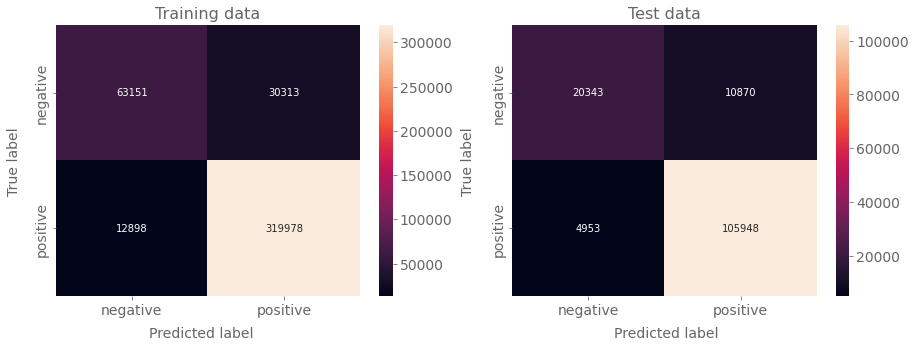

AUC_ROC train:	 0.9354833882630493
AUC_ROC test:	 0.9205419781488691


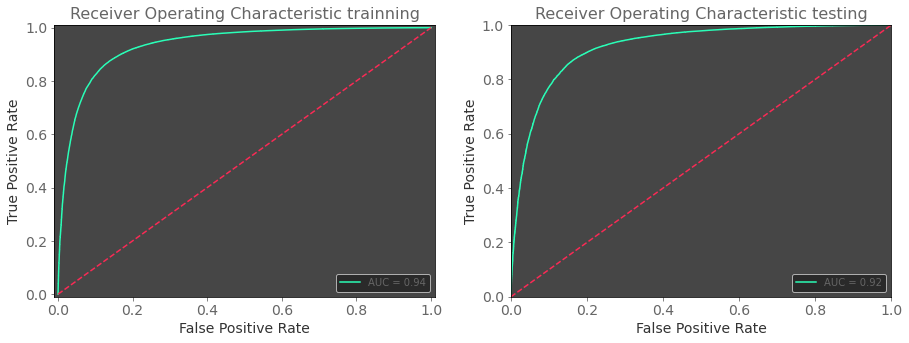

****************************TF-IDF****************************


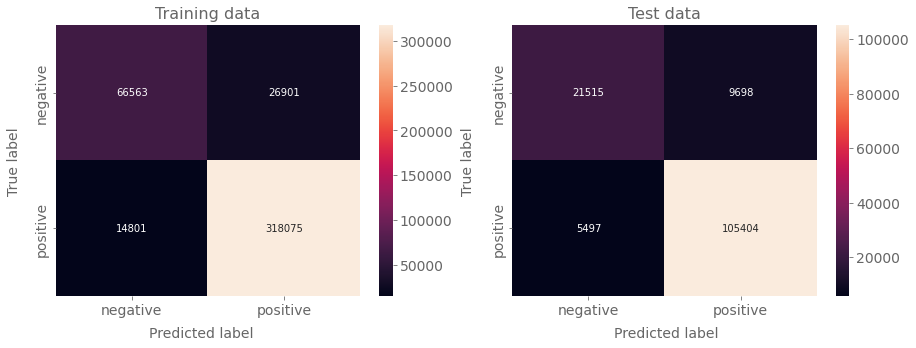

AUC_ROC train:	 0.941992026719394
AUC_ROC test:	 0.9321510726824473


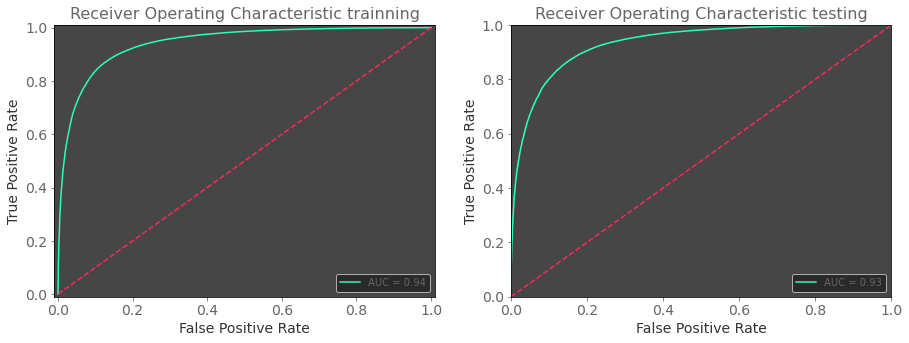

In [ ]:
# pot confusion matrix and roc curve
# Bag of words
print('*'*25+'Bag of words'+'*'*25)
plot_confusion_matrix(logreg_bow, Xtrain_bow, Xtest_bow, Ytrain, Ytest)
plot_roc(logreg_bow, Xtrain_bow, Xtest_bow, Ytrain, Ytest)

# Tf idf
print('*'*28+'TF-IDF'+'*'*28)
plot_confusion_matrix(logreg_tfidf, Xtrain_tfidf, Xtest_tfidf, Ytrain, Ytest)
plot_roc(logreg_tfidf, Xtrain_tfidf, Xtest_tfidf, Ytrain, Ytest)

In [ ]:
# train logistic regression model for bag of words
rf_bow = RandomForestClassifier(n_jobs=-1)
rf_bow.fit(Xtrain_bow, Ytrain)

# train logistic regression model for tfidf
rf_tfidf = RandomForestClassifier(n_jobs=-1)
rf_tfidf.fit(Xtrain_tfidf, Ytrain)

RandomForestClassifier(n_jobs=-1)

In [ ]:
# model performance
print('*'*25+'Bag of Words'+'*'*25)
performance_summary(rf_bow, Xtrain_bow, Xtest_bow, Ytrain, Ytest)
print('\n\n\n')
print('*'*28+'TF-IDF'+'*'*28)
performance_summary(rf_tfidf, Xtrain_tfidf, Xtest_tfidf, Ytrain, Ytest)

*************************Bag of Words*************************
Training Accuracy:
 0.9999108692592766


Test Accuracy:
 0.9006290724348058


Classification Report training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93464
           1       1.00      1.00      1.00    332876

    accuracy                           1.00    426340
   macro avg       1.00      1.00      1.00    426340
weighted avg       1.00      1.00      1.00    426340



Classification Report test:
               precision    recall  f1-score   support

           0       0.97      0.56      0.71     31213
           1       0.89      1.00      0.94    110901

    accuracy                           0.90    142114
   macro avg       0.93      0.78      0.83    142114
weighted avg       0.91      0.90      0.89    142114





****************************TF-IDF****************************
Training Accuracy:
 0.9999108692592766


Test Accuracy:
 0.898370322417214

*************************Bag of words*************************


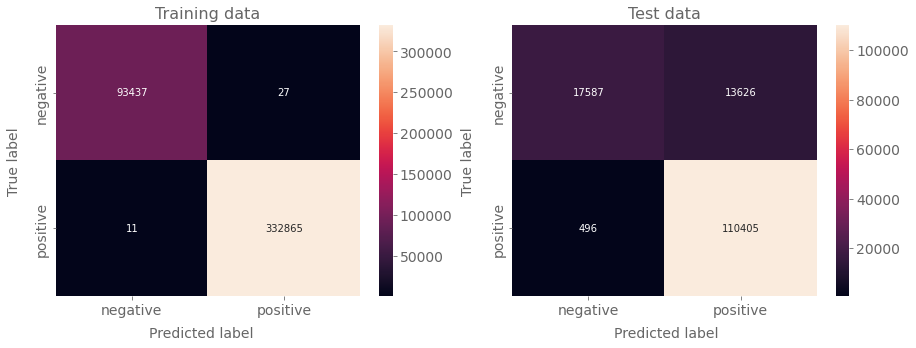

AUC_ROC train:	 0.9999978987797982
AUC_ROC test:	 0.963252049240017


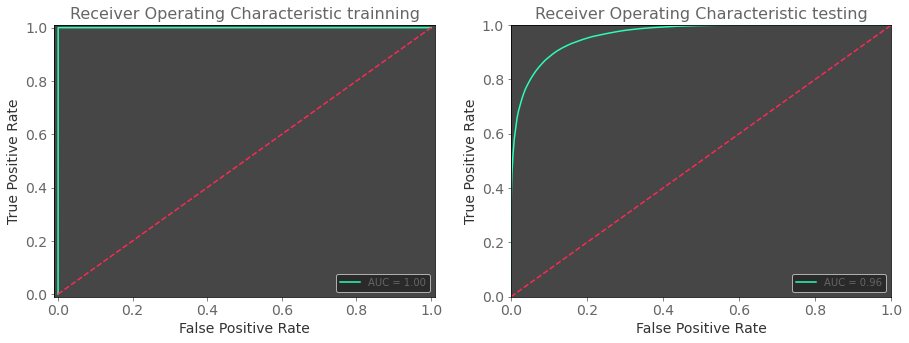

****************************TF-IDF****************************


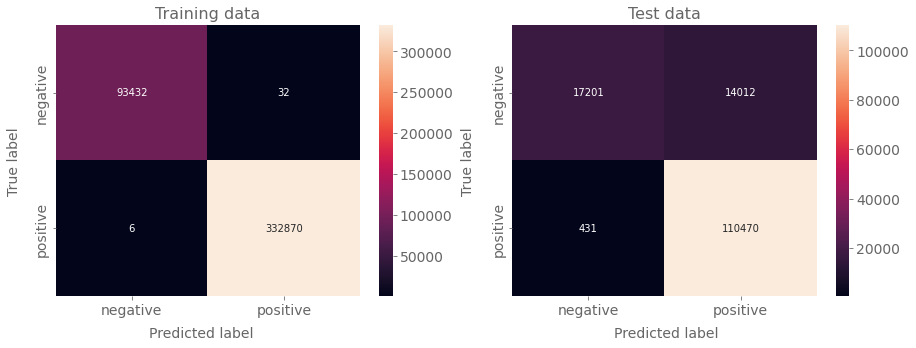

AUC_ROC train:	 0.9999980328120169
AUC_ROC test:	 0.9633933197946757


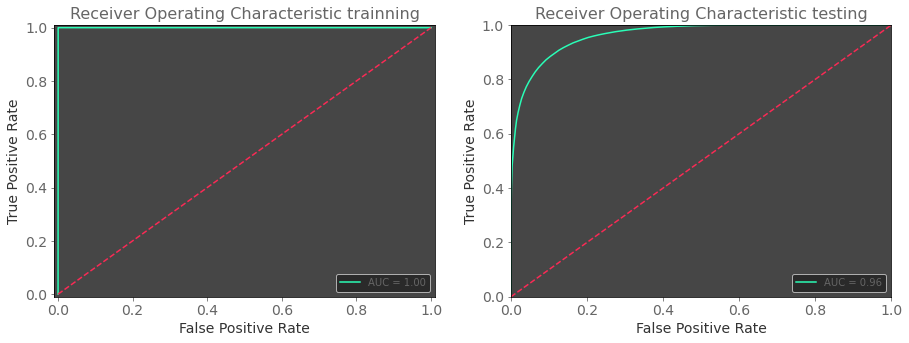

In [ ]:
# pot confusion matrix and roc curve
# Bag of words
print('*'*25+'Bag of words'+'*'*25)
plot_confusion_matrix(rf_bow, Xtrain_bow, Xtest_bow, Ytrain, Ytest)
plot_roc(rf_bow, Xtrain_bow, Xtest_bow, Ytrain, Ytest)

# Tf idf
print('*'*28+'TF-IDF'+'*'*28)
plot_confusion_matrix(rf_tfidf, Xtrain_tfidf, Xtest_tfidf, Ytrain, Ytest)
plot_roc(rf_tfidf, Xtrain_tfidf, Xtest_tfidf, Ytrain, Ytest)